<a href="https://colab.research.google.com/github/SANKOJUKEERTHI/GeekInformation/blob/main/GeekInformation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/GeekInfo/HR Aanalysis.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


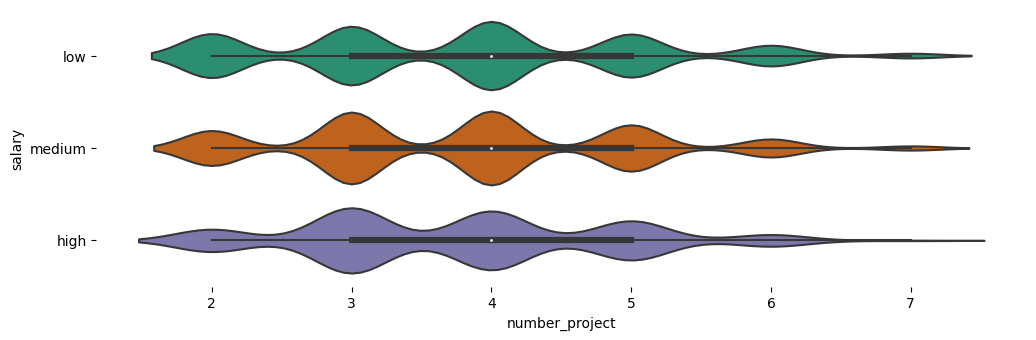

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['salary'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='number_project', y='salary', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

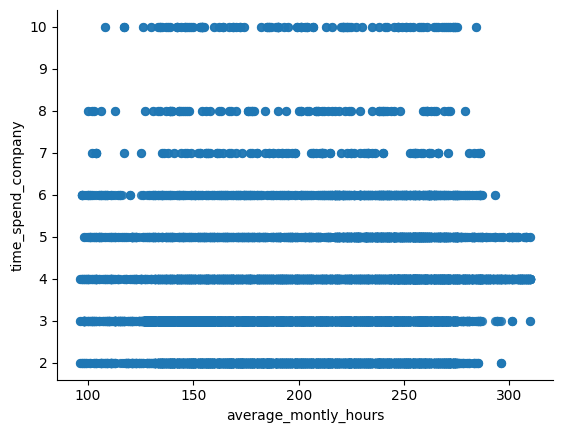

In [5]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='average_montly_hours', y='time_spend_company', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

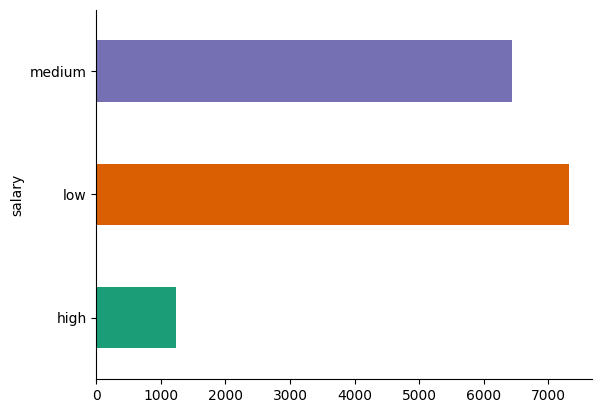

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('salary').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
# Check for missing values
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
# Handle duplicates
df.drop_duplicates(inplace=True)
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
# Descriptive statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# Assuming your DataFrame has a column named 'OldColumnName'
df.rename(columns={"sales": "Department"}, inplace=True)


<ipython-input-11-169d0e4d6eaf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


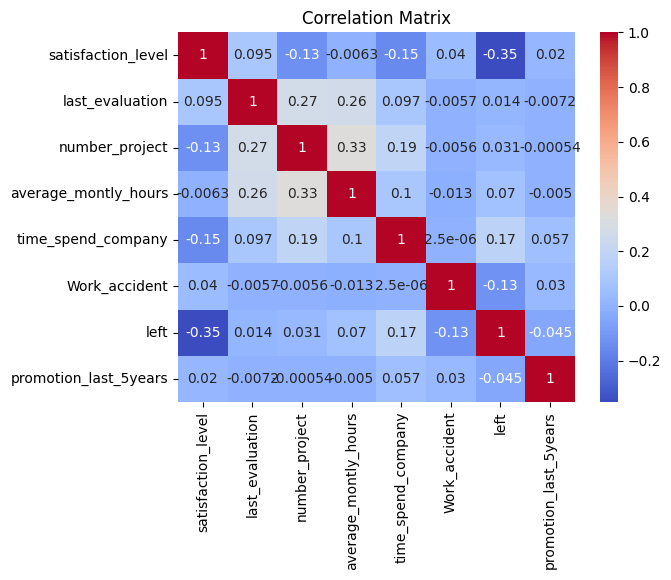

In [11]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

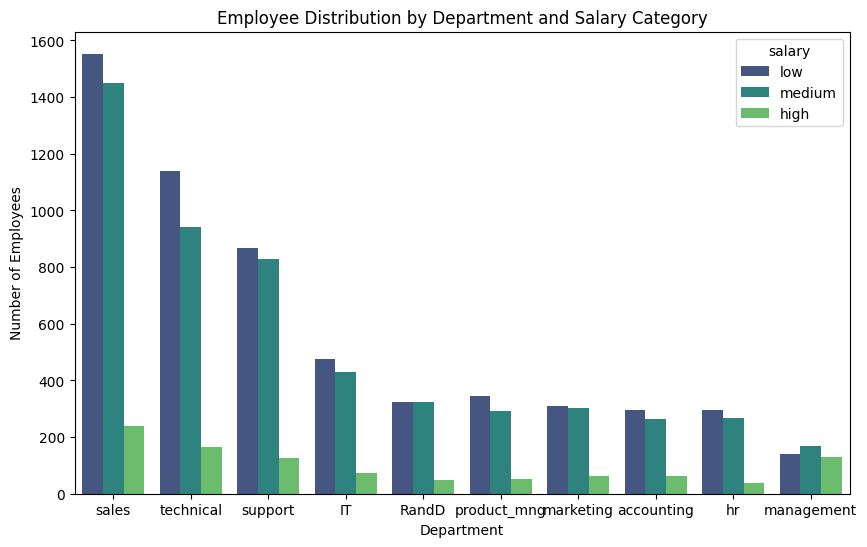

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='salary', data=df, order=df['Department'].value_counts().index, palette='viridis')
plt.title('Employee Distribution by Department and Salary Category')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

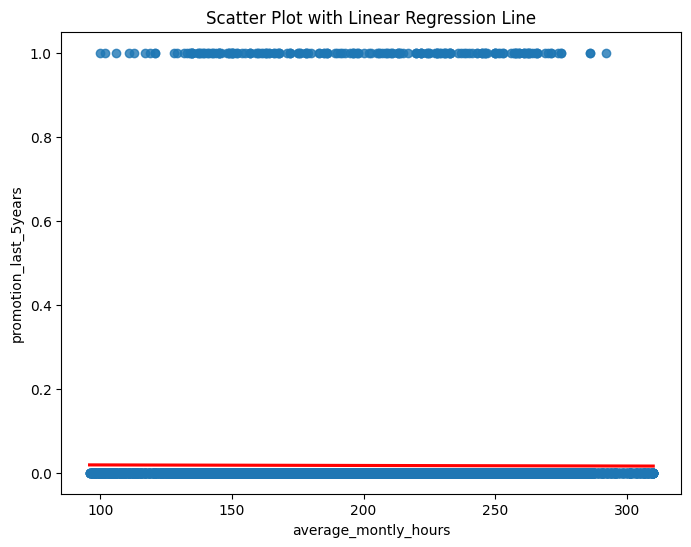

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='average_montly_hours', y='promotion_last_5years', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('average_montly_hours')
plt.ylabel('promotion_last_5years')
plt.show()

In [14]:
#plot of department wise promotions
promoted_last_five_years = df[(df['promotion_last_5years'] == 1)]

# Group by department and calculate the percentage of promoted employees
promotion_percentage_by_department = promoted_last_five_years.groupby('Department').size() / df.groupby('Department').size()* 100

# Print the result
print(promotion_percentage_by_department)

Department
IT             0.204918
RandD          3.025937
accounting     1.610306
hr             1.830283
management     8.256881
marketing      4.011887
product_mng         NaN
sales          1.790676
support        0.878638
technical      0.980392
dtype: float64


In [16]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Sample data (replace this with your actual DataFrame)

# Define the columns to be encoded and scaled
categorical_cols = ['Department', 'salary']
numeric_cols = ["satisfaction_level",	"last_evaluation",	"number_project","average_montly_hours",	"time_spend_company",	"Work_accident",	"left"]

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create a pipeline with the column transformer and linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Separate features (X) and target variable (Y)
X = df.drop('promotion_last_5years', axis=1)
Y = df["promotion_last_5years"]

# Fit the pipeline
pipeline.fit(X, Y)

# Print coefficients and intercept
print('Coefficients:', pipeline.named_steps['regressor'].coef_)
print('Intercept:', pipeline.named_steps['regressor'].intercept_)


Coefficients: [ 0.00175502 -0.0013874  -0.00039685 -0.00054288  0.00719088  0.00308132
 -0.0045174   0.02743303  0.013658    0.0173965   0.07106797  0.03691111
 -0.00202247  0.01553849  0.00692691  0.00842155 -0.02811771 -0.0136726 ]
Intercept: 0.021855666886209588


In [20]:
predictions = pipeline.predict(X)
from sklearn.metrics import mean_squared_error
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Y, predictions))
print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.127349750712231
